In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")


In [2]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')



print("Train Data Shape:", train.shape)
print("Test Data Shape:", test.shape)
print("\nTrain Data Info:")
print(train.info())

Train Data Shape: (891, 12)
Test Data Shape: (418, 11)

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
print("\nMissing values in Train Data:")
print(train.isnull().sum())


Missing values in Train Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Figure size 1200x600 with 0 Axes>

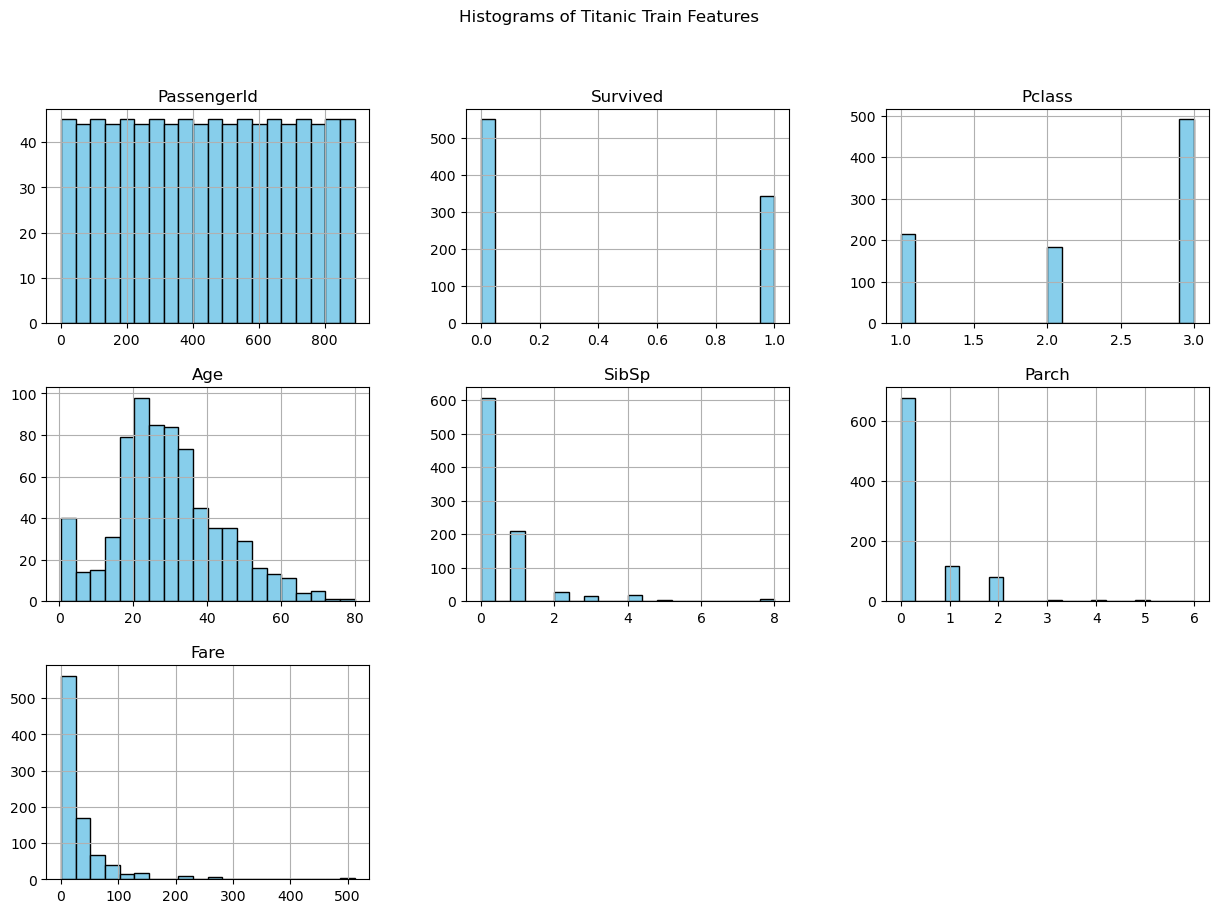

In [4]:
plt.figure(figsize=(12,6))
train.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Titanic Train Features")
plt.show()

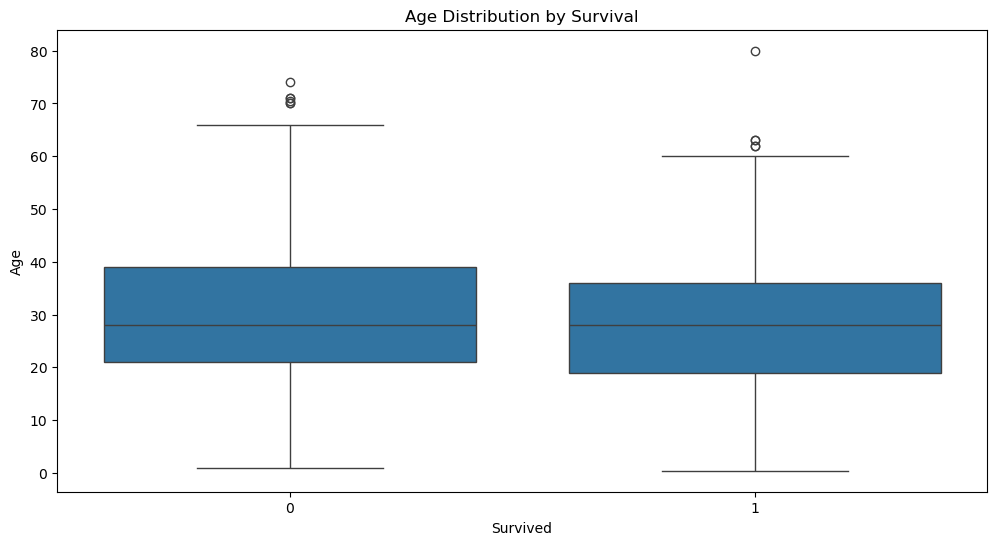

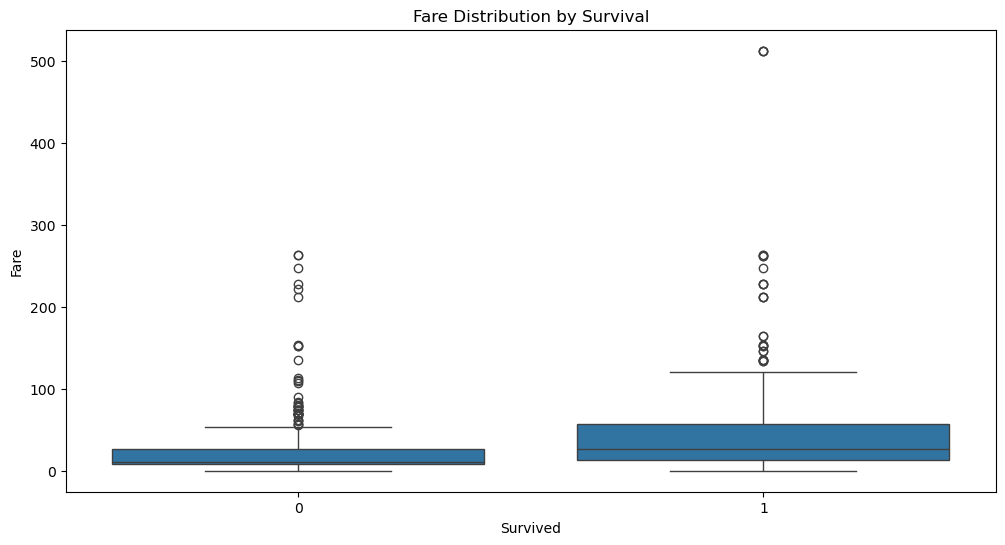

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age Distribution by Survival')
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare Distribution by Survival')
plt.show()

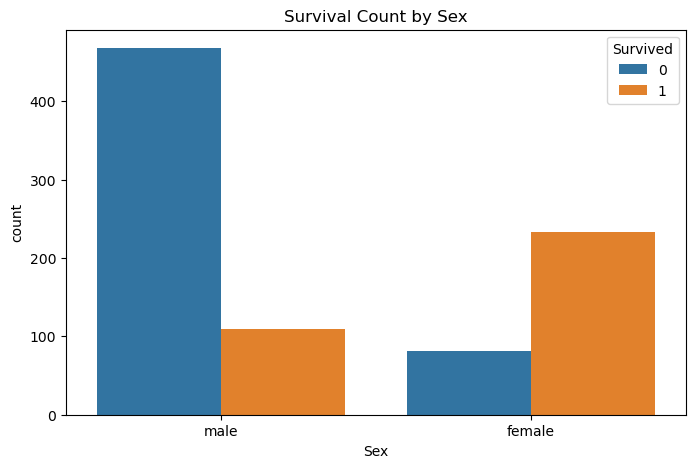

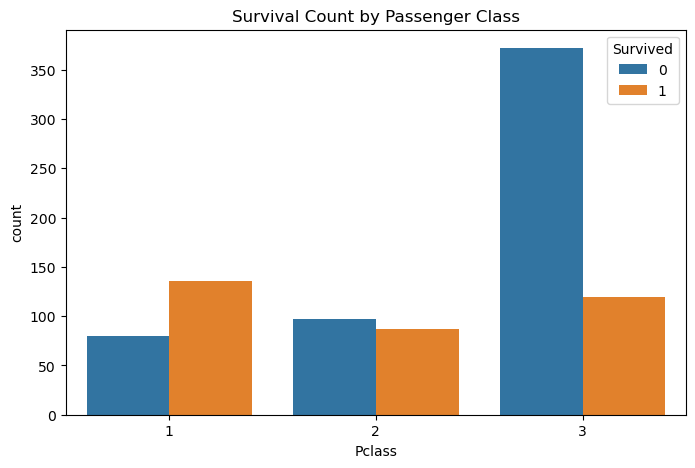

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Count by Sex')
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Count by Passenger Class')
plt.show()

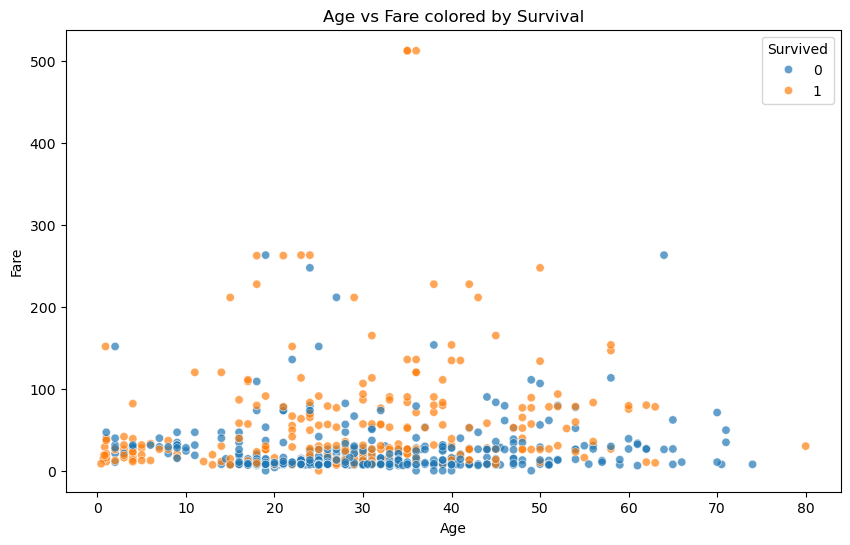

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train, alpha=0.7)
plt.title('Age vs Fare colored by Survival')
plt.show()

In [8]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)


train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)


train['Fare'].fillna(train['Fare'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [9]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True, errors='ignore')



train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [10]:
train, test = train.align(test, join='left', axis=1, fill_value=0)


print("\nProcessed Train Data:")
print(train.head())


Processed Train Data:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


<Figure size 1200x600 with 0 Axes>

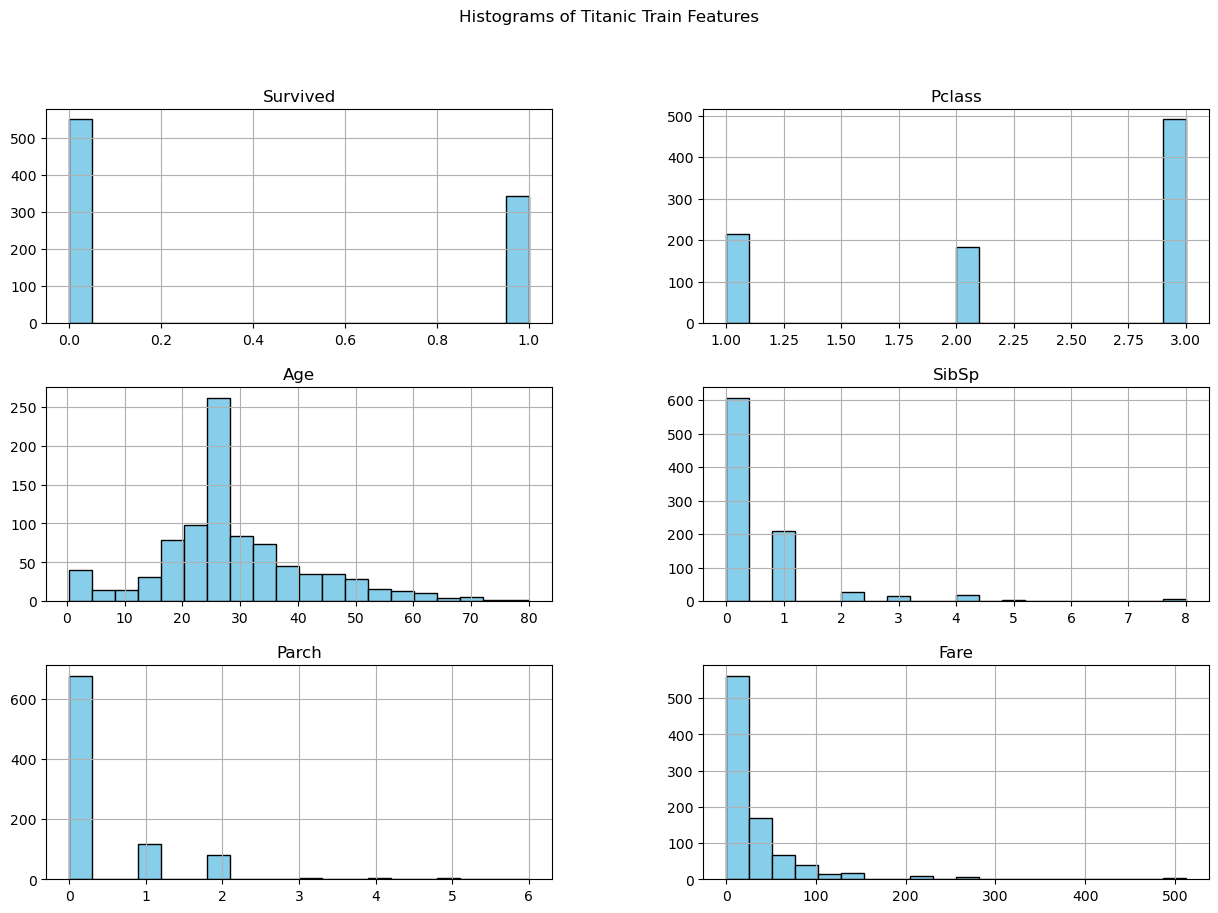

In [11]:
plt.figure(figsize=(12,6))
train.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Titanic Train Features")
plt.show()

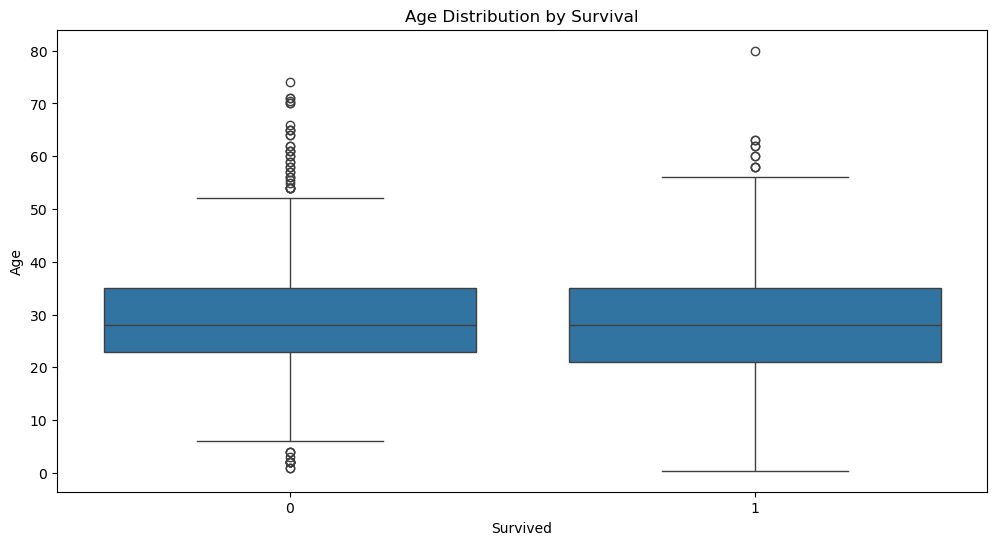

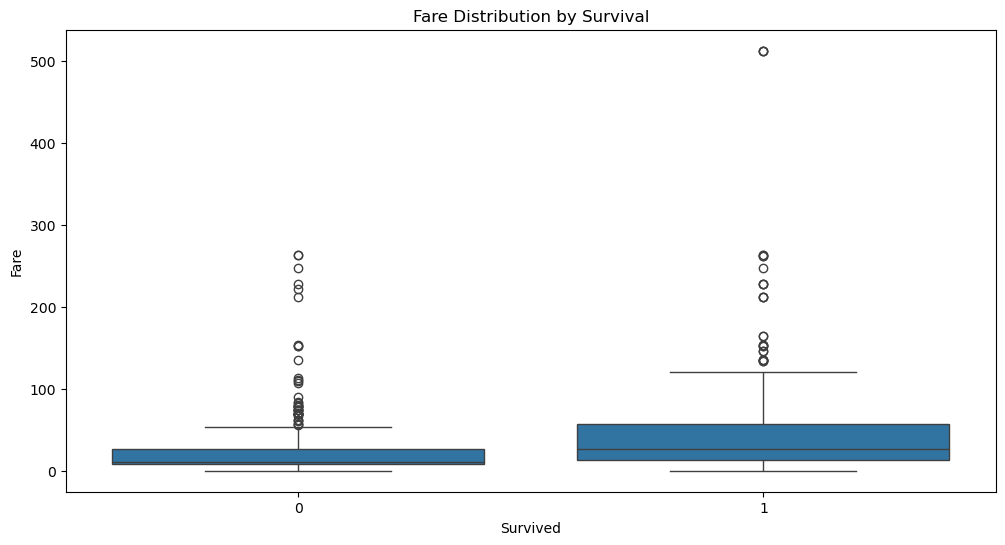

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age Distribution by Survival')
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare Distribution by Survival')
plt.show()

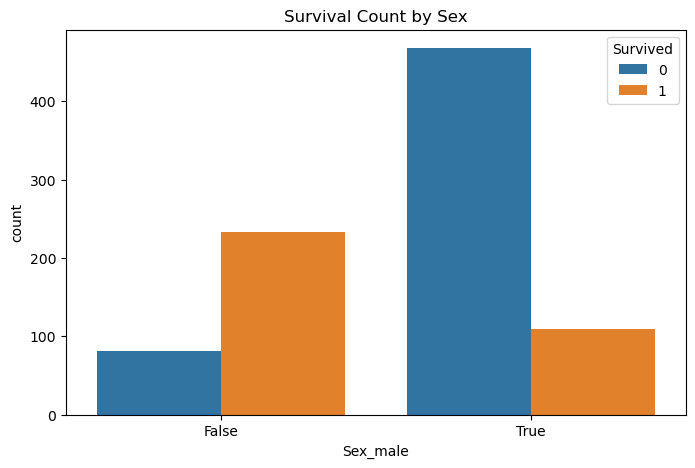

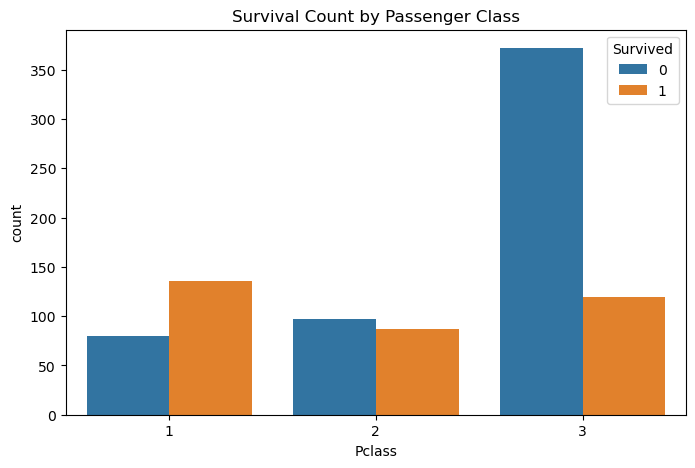

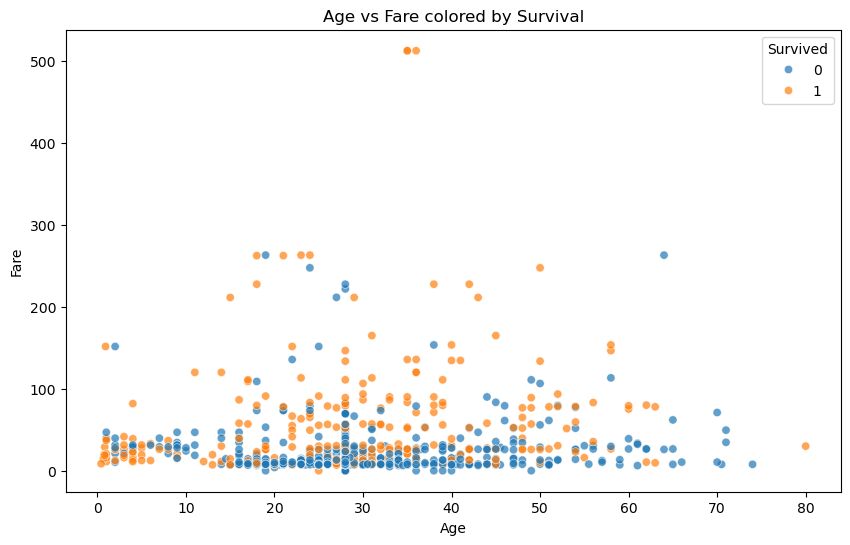

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex_male', hue='Survived', data=train)
plt.title('Survival Count by Sex')
plt.show()


plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Count by Passenger Class')
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train, alpha=0.7)
plt.title('Age vs Fare colored by Survival')
plt.show()

In [14]:
X = train.drop('Survived', axis=1)
y = train['Survived']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)


lgb_preds = lgb_model.predict(X_val)


print("\nLightGBM Performance:")
print("Accuracy:", accuracy_score(y_val, lgb_preds))
print("Precision:", precision_score(y_val, lgb_preds))
print("Recall:", recall_score(y_val, lgb_preds))
print("F1-score:", f1_score(y_val, lgb_preds))
print("\nClassification Report:\n", classification_report(y_val, lgb_preds))

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [16]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


xgb_preds = xgb_model.predict(X_val)


print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_val, xgb_preds))
print("Precision:", precision_score(y_val, xgb_preds))
print("Recall:", recall_score(y_val, xgb_preds))
print("F1-score:", f1_score(y_val, xgb_preds))
print("\nClassification Report:\n", classification_report(y_val, xgb_preds))


XGBoost Performance:
Accuracy: 0.8044692737430168
Precision: 0.7575757575757576
Recall: 0.7246376811594203
F1-score: 0.7407407407407407

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [17]:
param_grid = {
'num_leaves': [31, 50],
'max_depth': [-1, 10, 20],
'learning_rate': [0.01, 0.05, 0.1],
'n_estimators': [100, 200]
}


grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)


print("\nBest Parameters for LightGBM:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)

[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [18]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)


lgb_results = {
'Accuracy': accuracy_score(y_val, lgb_preds),
'Precision': precision_score(y_val, lgb_preds),
'Recall': recall_score(y_val, lgb_preds),
'F1-score': f1_score(y_val, lgb_preds)
}

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [19]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)


xgb_results = {
'Accuracy': accuracy_score(y_val, xgb_preds),
'Precision': precision_score(y_val, xgb_preds),
'Recall': recall_score(y_val, xgb_preds),
'F1-score': f1_score(y_val, xgb_preds)
}


print("\nXGBoost Classification Report:\n", classification_report(y_val, xgb_preds))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179




Comparative Results:
           Accuracy  Precision    Recall  F1-score
LightGBM  0.798883   0.753846  0.710145  0.731343
XGBoost   0.804469   0.757576  0.724638  0.740741


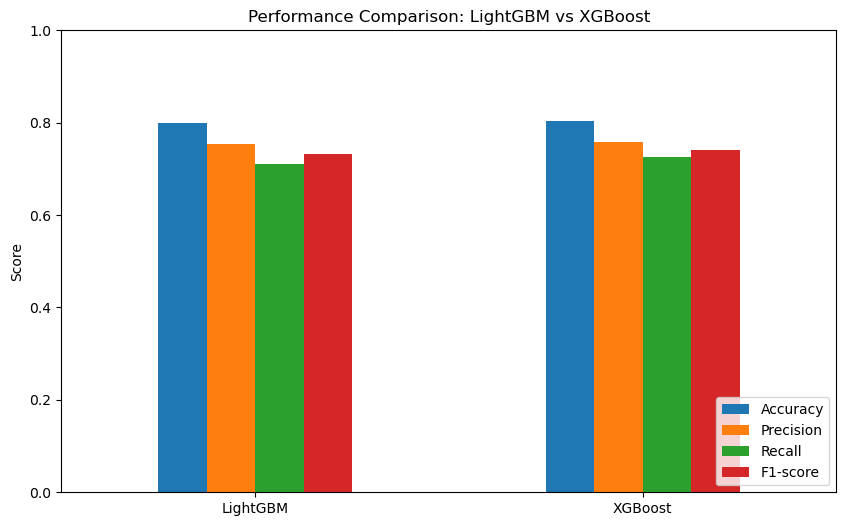

In [20]:
results_df = pd.DataFrame([lgb_results, xgb_results], index=['LightGBM', 'XGBoost'])
print("\nComparative Results:\n", results_df)



results_df.plot(kind='bar', figsize=(10,6))
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

In [22]:
if lgb_results['Accuracy'] > xgb_results['Accuracy']:
  print("LightGBM achieved  accuracy than XGBoost.")
else:
  print("XGBoost achieved  accuracy than LightGBM.")

XGBoost achieved  accuracy than LightGBM.
